# **Project Description**

This project is aimed to analyze COVID-19 dataset by exploring trends and correlations between confirmed cases, recoveries, and deaths globally and regionally during the first wave of pandemic.

---


Our analysis based on the COVId-19 dataset sourced from Kaggle compiled by Imdevskp. As the data were aggregated from sources: WHO, government reports, and health agencies, it is considered to be reliable.


---

Notably, as the project focused on the first wave period of COVID-19 pandemic, the dataset only covered time period from 2020 January to 2020 August.

---

Our goal is to analyze trends and generate some insights from our data.

---


Data sources link: [COVID-19 Dataset](https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data)

---

Github repo link: https://github.com/ThantSinTun009/Covid-19-Data-Analysis-First-Wave-

# **Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Data Understanding**

In [2]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')
df.tail(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [3]:
# Getting a summary
df.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [4]:
df.shape

(49068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [6]:
print("Data types in dataframe: \n")
print(df.dtypes)

Data types in dataframe: 

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object


#**Data Preprocessing**

**Data Cleaning**

In [7]:
# Checking missing values
print("Missing values in dataframe : \n")

print(df.isnull().sum())


Missing values in dataframe : 

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


*** Note : As null values fro Province/State column are over two-third of our data points, we decided to not remove them and not use the column as well in our core analysis. ***

In [8]:
# Converting Date Columns to Datetime*
df['Date'] = pd.to_datetime(df['Date'])

#**Data Analysis & Visualization**

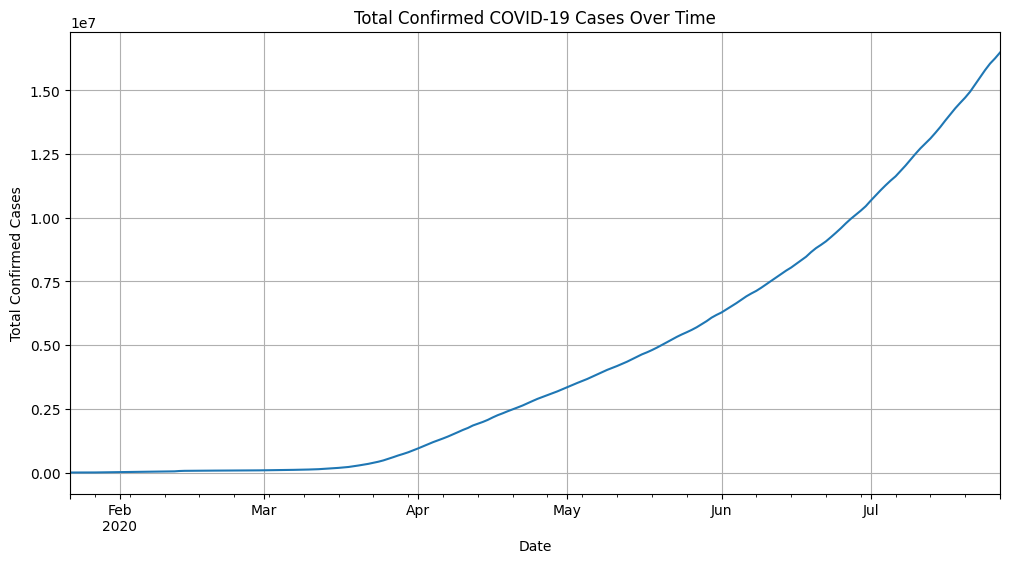

In [9]:
# Total Confirmed Cases Over Time
# For better understanding
plt.figure(figsize=(12, 6))
df.groupby('Date')['Confirmed'].sum().plot()
plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid()
plt.show()

***As the plot visualizes the trend of confirmed cases over time, it is an increasing trend meaning that COVID-19 pandemic started to become viral during the last week of March.***

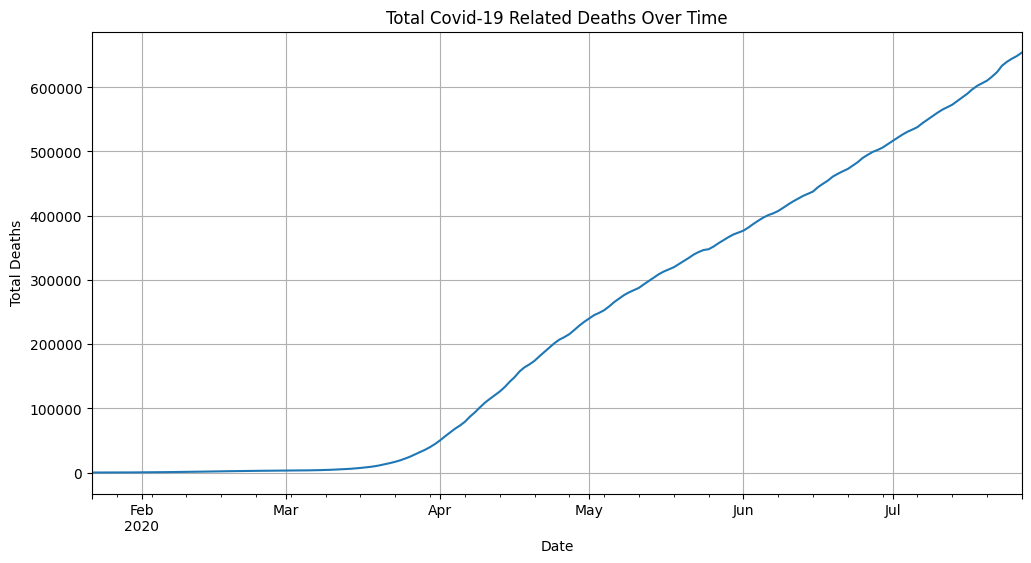

In [10]:
# Total COVID19 related Deaths Over Time
# For better understanding
plt.figure(figsize=(12, 6))
df.groupby('Date')['Deaths'].sum().plot()
plt.title('Total Covid-19 Related Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid()
plt.show()

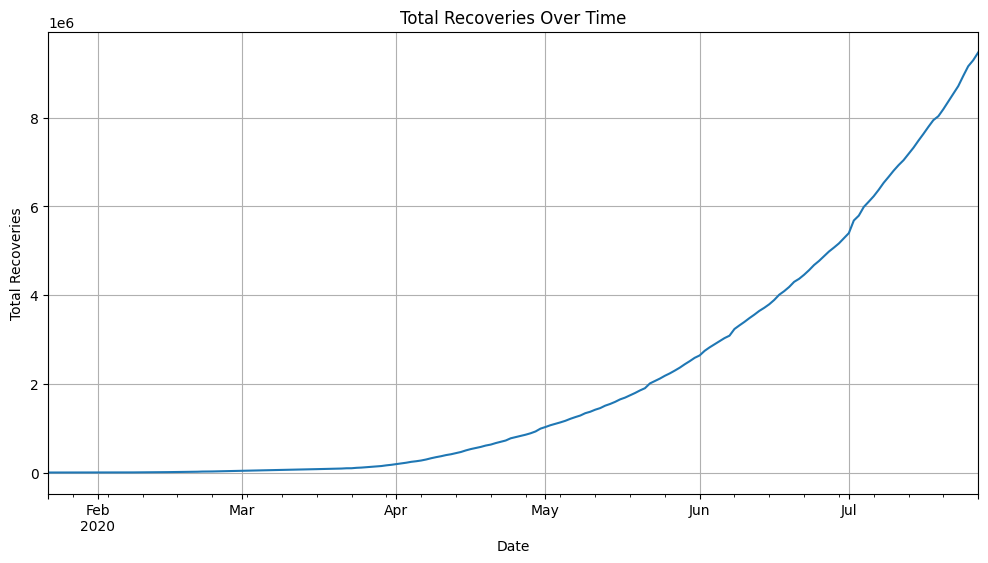

In [11]:
# Total Recoveries Over Time
# For better understanding
plt.figure(figsize=(12, 6))
df.groupby('Date')['Recovered'].sum().plot()
plt.title('Total Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Total Recoveries')
plt.grid()
plt.show()

In [12]:
# Confirmed cases over time for US

"""plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=df[df['Country/Region'] == 'US'])
plt.title('Confirmed Cases Over Time - US')

plt.show()"""

"plt.figure(figsize=(10, 6))\nsns.lineplot(x='Date', y='Confirmed', data=df[df['Country/Region'] == 'US'])\nplt.title('Confirmed Cases Over Time - US')\n\nplt.show()"

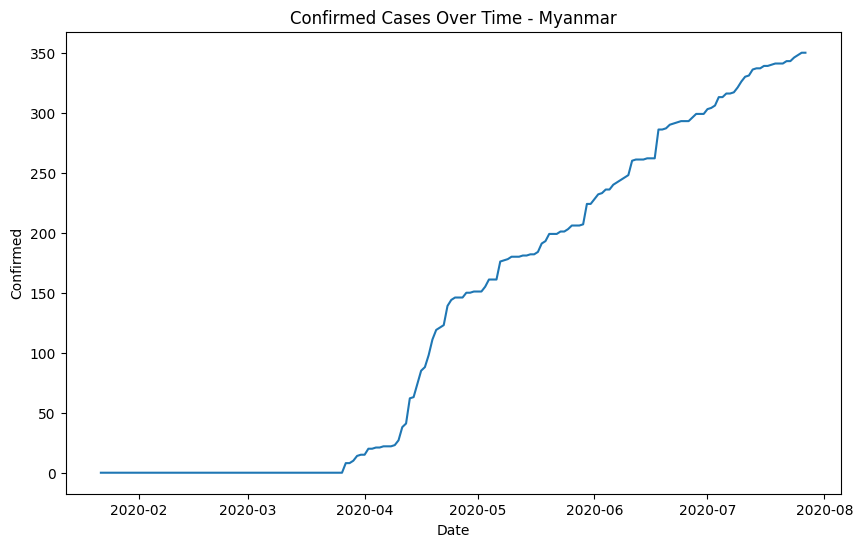

In [ ]:
# Confirmed cases over time for a Myanmar

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=df[df['Country/Region'] == 'Burma'])
plt.title('Confirmed Cases Over Time - Myanmar')

plt.show()

According to the line graph, it show the first confirmed case of COVID-19 in Myanmar was found in 28th March 2020, which was already proven by WHO (World Health Organization). [[ Reference ]](https://www.who.int/myanmar/publications/curriculum-on-covid-19-response-for-myanmar-community-health-volunteers) Moreover, it is notable that the trend of COVID-19 confirmed cases in Myanmar also aligned with the global trend.

**Correlation Matrix**

In [ ]:
# Excluding non-numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()  # correlation matrix

print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
           Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.912361   0.895506  0.950255
Deaths      0.912361  1.000000   0.763090  0.891858
Recovered   0.895506  0.763090   1.000000  0.713088
Active      0.950255  0.891858   0.713088  1.000000


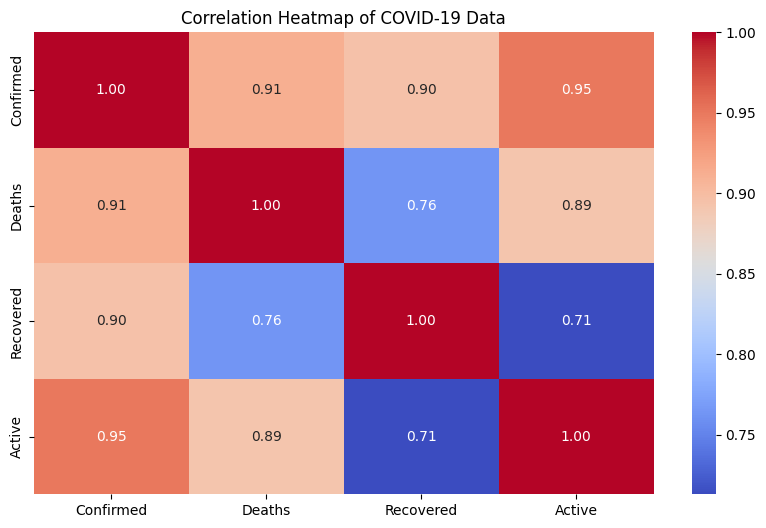

In [ ]:
# Visualizing correlation with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Data')

plt.show()

There is a strong positive correlation of 0.91 (close to 1) between confirmed cases and deaths, indicating that as the number of confirmed cases increases, the number of deaths tends to increase as well.

---

There is also a strong positive correlation between confirmed cases and recovered cases, suggesting that higher confirmed cases are associated with a higher number of recoveries.

---
Typically, it is normal to expect a negative correlation, as deaths and recovery are totally opposite. However, the correlation coefficient between "Deaths" and "Recovered" is approximately 0.76, indicating a strong positive correlation. It could indicate that in some regions, the healthcare response were sufficient and improved during the first wave of COVID-19 pandemic, leading to higher recovery rates even as deaths occur globally.

---



**Death Percentages Over the World**

1.   WHO RegionsList item
2.   Europe
3.   Western Pacific
4.   Globally

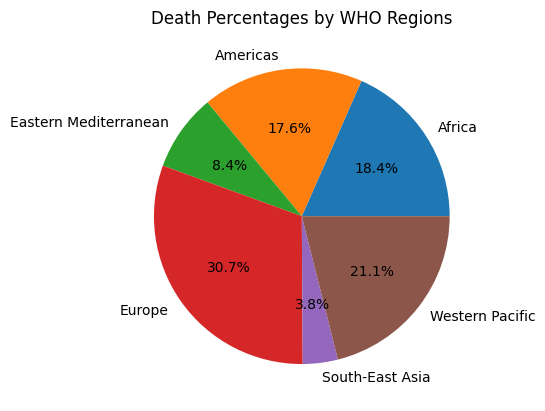

In [ ]:
# For WHO Regions
death_whoregion=df.groupby('WHO Region')['Deaths'].count()
# print(death_whoregion, '\n')

plt.pie(death_whoregion, labels=death_whoregion.index, autopct='%1.1f%%')
plt.title('Death Percentages by WHO Regions')
plt.show()

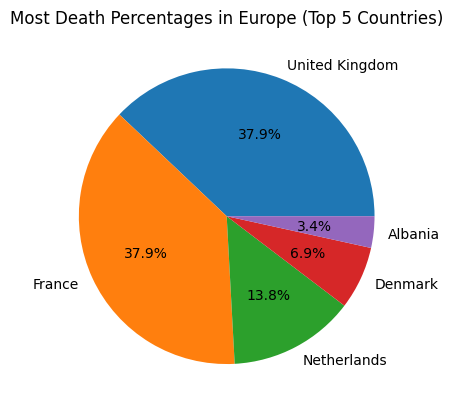

In [ ]:
# For Europe
death_eu=df[df['WHO Region']=='Europe'].groupby('Country/Region')['Deaths'].count().sort_values(ascending=False).head(5)
# print(death_eu, '\n')

plt.pie(death_eu, labels=death_eu.index, autopct='%1.1f%%')
plt.title('Most Death Percentages in Europe (Top 5 Countries)')
plt.show()

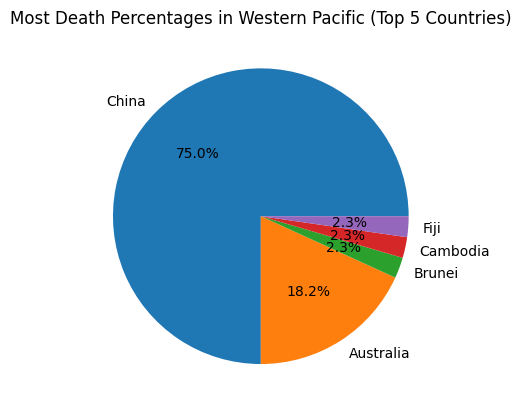

In [13]:
# For Western Pacific
death_wp=df[df['WHO Region']=='Western Pacific'].groupby('Country/Region')['Deaths'].count().sort_values(ascending=False).head(5)
# print(death_wp, '\n')

plt.pie(death_wp, labels=death_wp.index, autopct='%1.1f%%')
plt.title('Most Death Percentages in Western Pacific (Top 5 Countries)')
plt.show()

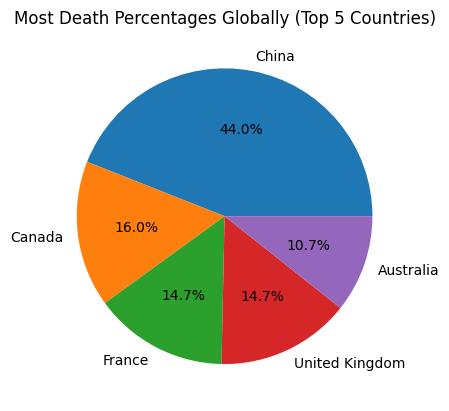

In [ ]:
# Most Death Percentage (Globally)
death_global=df.groupby('Country/Region')['Deaths'].count().sort_values(ascending=False).head(5)
# print(death_global, '\n')

plt.pie(death_global, labels=death_global.index, autopct='%1.1f%%')
plt.title('Most Death Percentages Globally (Top 5 Countries)')
plt.show()

In [ ]:
recovery_who =df.groupby('WHO Region')['Recovered'].count()
print(recovery_who)

WHO Region
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
Europe                   15040
South-East Asia           1880
Western Pacific          10340
Name: Recovered, dtype: int64


**Analyzing which regions need the most attention for heathcare**

In [15]:
# Group the data
grouped_df = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Active', 'Recovered']].sum().reset_index()

# Define the x locations
x = np.arange(len(grouped_df['WHO Region']))  # Number of WHO regions
bar_width = 0.2  # Width of each bar

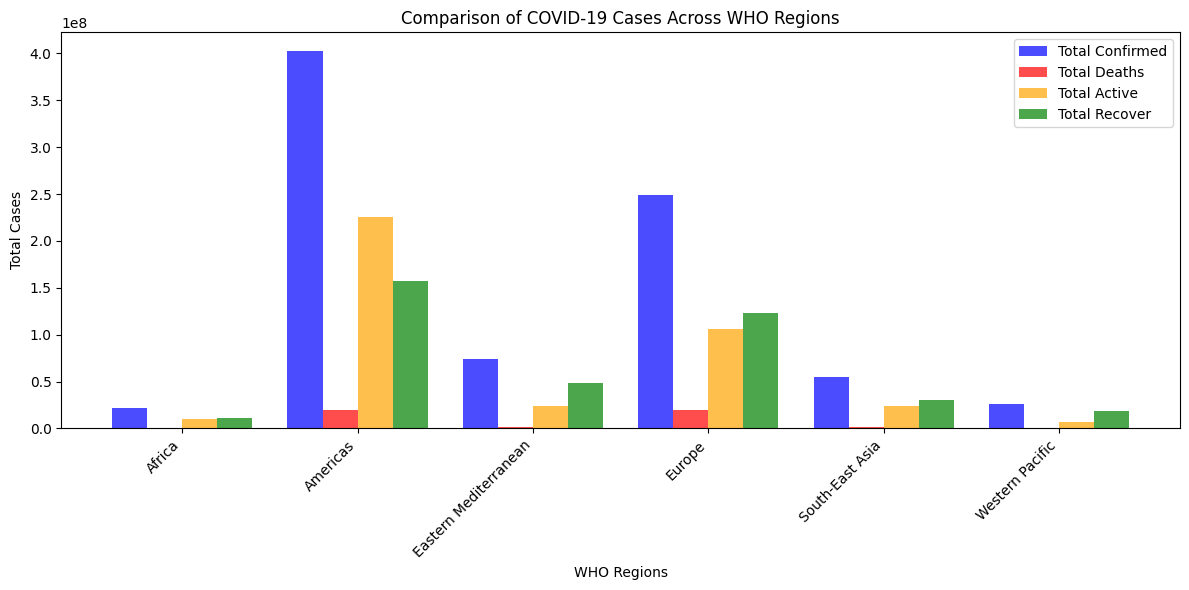

In [17]:
# Create three sided bar plots
plt.figure(figsize=(12, 6))

plt.bar(x, grouped_df['Confirmed'], width=bar_width, label='Total Confirmed', color='blue', alpha=0.7)
plt.bar(x + bar_width, grouped_df['Deaths'], width=bar_width, label='Total Deaths', color='red', alpha=0.7)
plt.bar(x + 2 * bar_width, grouped_df['Active'], width=bar_width, label='Total Active', color='orange', alpha=0.7)
plt.bar(x + 3 * bar_width, grouped_df['Recovered'], width=bar_width, label='Total Recover', color='green', alpha=0.7)


plt.xlabel('WHO Regions')
plt.ylabel('Total Cases')
plt.title('Comparison of COVID-19 Cases Across WHO Regions')
plt.xticks(x + 1.5 * bar_width, grouped_df['WHO Region'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

***According to the plots, we can see the regions that may require more attention in terms of healthcare resources and interventions during the first wave of COVID-19 pandemic. Contries from Americas, Eastern Mediterranean and Europe required more healthcare support during the beginning of global pandemic***